# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\gowth\plant_disease\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

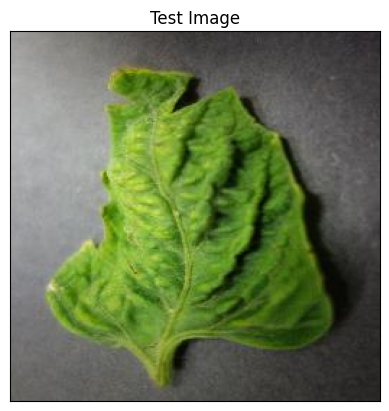

In [42]:
#Test Image Visualization
import cv2
image_path = r"C:\Users\gowth\plant_disease\test\TomatoYellowCurlVirus4.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [43]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 32ms/step


In [44]:
print(predictions)

[[3.62640085e-10 8.39660806e-12 4.89864419e-07 4.75867401e-10
  8.85063078e-10 1.78813675e-08 7.72965719e-11 4.73721173e-10
  8.66694563e-12 1.40833595e-11 4.00350586e-11 4.79080882e-08
  8.35787262e-09 3.53788181e-08 2.75447720e-10 2.51904755e-08
  7.24144611e-09 5.89715221e-10 9.42393275e-09 1.56845292e-08
  7.09583564e-12 2.15721108e-10 3.03806291e-09 5.73747172e-07
  1.77215731e-09 2.03996340e-08 5.82996318e-09 1.48662638e-10
  1.24612998e-04 1.80820393e-06 7.47153237e-08 3.88685351e-09
  1.45384185e-08 6.65484663e-07 6.83053941e-07 9.99866009e-01
  4.62903745e-06 1.67479641e-07]]


In [45]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


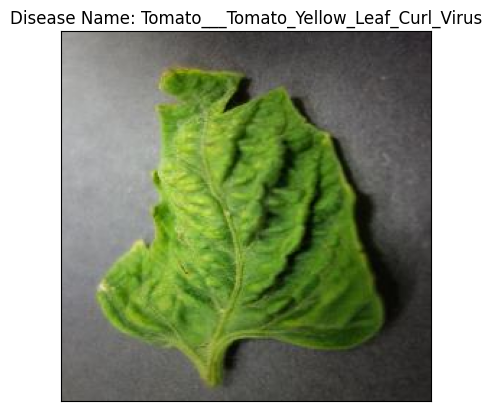

In [46]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 17572 files belonging to 38 classes.
Classes detected: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato

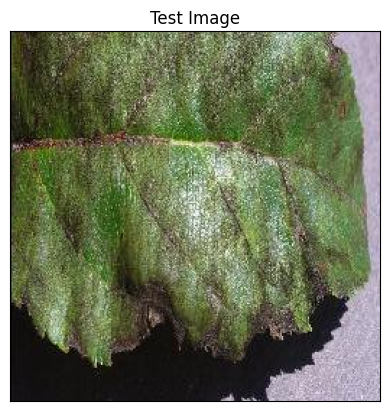

1/1 [==============================] - 0s 150ms/step
Predicted Disease: Potato___Early_blight
Suggested Remedy: Apply fungicides containing chlorothalonil or mancozeb. Rotate crops to avoid recurrence.


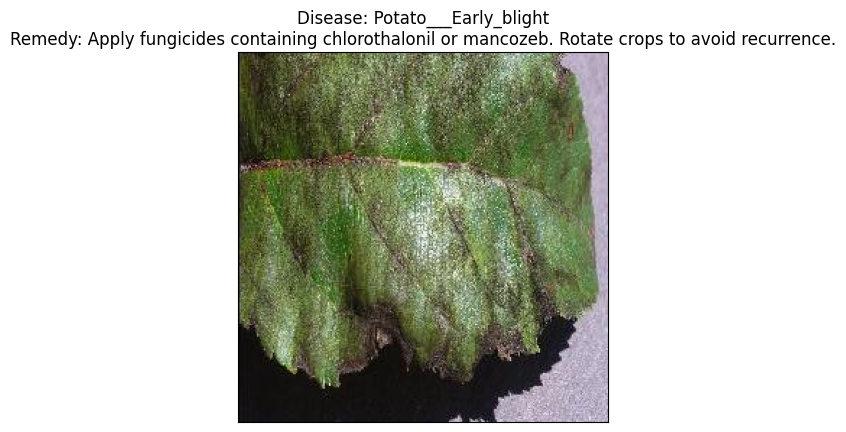

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Load validation dataset to get class names
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\gowth\plant_disease\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

class_name = validation_set.class_names
print("Classes detected:", class_name)

# Load the trained CNN model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Define the remedy dictionary
remedy_dict = {
    'Apple___Apple_scab': 'Use fungicides like copper sulfate or sulfur-based products. Remove affected leaves.',
    'Apple___Black_rot': 'Remove infected fruits, leaves, and stems. Apply fungicides if necessary.',
    'Apple___Cedar_apple_rust': 'Remove affected leaves and fruits. Apply fungicides to prevent further spread.',
    'Apple___healthy': 'No action needed. Keep the plants well-watered and healthy.',
    'Blueberry___healthy': 'No action needed. Ensure well-drained soil and proper sunlight for the plants.',
    'Cherry_(including_sour)___Powdery_mildew': 'Use fungicides like sulfur-based products. Remove affected leaves.',
    'Cherry_(including_sour)___healthy': 'No action needed. Keep the plants healthy and well-maintained.',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Apply fungicides containing chlorothalonil or copper. Remove infected leaves.',
    'Corn_(maize)___Common_rust_': 'Use fungicides to treat, remove infected plants to limit spread.',
    'Corn_(maize)___Northern_Leaf_Blight': 'Remove infected leaves and use fungicides like azoxystrobin.',
    'Corn_(maize)___healthy': 'No action needed. Ensure proper watering and sunlight for optimal growth.',
    'Grape___Black_rot': 'Use copper-based fungicides and remove infected leaves and fruits.',
    'Grape___Esca_(Black_Measles)': 'Prune infected vines, ensure good air circulation, and apply appropriate fungicides.',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Remove affected leaves and apply fungicides like myclobutanil.',
    'Grape___healthy': 'No action needed. Ensure proper vineyard management and good airflow around the vines.',
    'Orange___Haunglongbing_(Citrus_greening)': 'Use insecticides to control the vector (Asian citrus psyllid). Remove infected trees to prevent spread.',
    'Peach___Bacterial_spot': 'Apply copper-based bactericides. Remove infected fruit and leaves.',
    'Peach___healthy': 'No action needed. Ensure the plant gets adequate sunlight and water.',
    'Pepper,_bell___Bacterial_spot': 'Apply copper-based bactericides. Avoid overhead watering to reduce the spread.',
    'Pepper,_bell___healthy': 'No action needed. Maintain healthy growing conditions with balanced watering and sunlight.',
    'Potato___Early_blight': 'Apply fungicides containing chlorothalonil or mancozeb. Rotate crops to avoid recurrence.',
    'Potato___Late_blight': 'Apply fungicides like copper or mefenoxam. Remove infected plants to limit spread.',
    'Potato___healthy': 'No action needed. Ensure proper irrigation and soil drainage.',
    'Raspberry___healthy': 'No action needed. Keep the plants well-watered and avoid overcrowding.',
    'Soybean___healthy': 'No action needed. Ensure soil health and proper irrigation.',
    'Squash___Powdery_mildew': 'Use fungicides like sulfur or potassium bicarbonate. Remove affected leaves.',
    'Strawberry___Leaf_scorch': 'Remove affected leaves. Apply fungicides if necessary.',
    'Strawberry___healthy': 'No action needed. Ensure proper care and avoid excessive watering.',
    'Tomato___Bacterial_spot': 'Apply copper-based bactericides. Avoid overhead watering to reduce infection.',
    'Tomato___Early_blight': 'Apply fungicides like chlorothalonil. Remove affected leaves to stop the spread.',
    'Tomato___Late_blight': 'Apply fungicides containing copper or mefenoxam. Remove infected plants immediately.',
    'Tomato___Leaf_Mold': 'Use fungicides like chlorothalonil or myclobutanil. Improve air circulation around plants.',
    'Tomato___Septoria_leaf_spot': 'Use fungicides like chlorothalonil and remove affected leaves.',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Use miticides or insecticidal soaps to control mites.',
    'Tomato___Target_Spot': 'Use fungicides containing azoxystrobin or chlorothalonil. Remove infected leaves.',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Remove infected plants immediately. Insecticides can control the vector (whiteflies).',
    'Tomato___Tomato_mosaic_virus': 'Remove and destroy infected plants. Use virus-free seeds and control aphid populations.',
    'Tomato___healthy': 'No action needed. Keep the plants well-maintained and properly irrigated.'
}

# Test Image Visualization
image_path = r"C:\Users\gowth\plant_disease\test\AppleScab3.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])  # Hide ticks
plt.yticks([])  # Hide ticks
plt.show()

# Preprocessing the image for the model
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch

# Make prediction
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)  # Index of the max probability

# Get the predicted disease name
model_prediction = class_name[result_index]
print(f"Predicted Disease: {model_prediction}")

# Suggest remedy
remedy = remedy_dict.get(model_prediction, 'Remedy not found for this disease.')
print(f"Suggested Remedy: {remedy}")

# Displaying the disease prediction with remedy
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nRemedy: {remedy}")
plt.xticks([])  # Hide ticks
plt.yticks([])  # Hide ticks
plt.show()
